# Sentiment Analysis Machine Learning Model

### This project aims to developed multiple machine learning models which performed sentiment analysis on a large set of tweets.


## Analysis on dataset

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re

file = pd.read_csv("train.csv", index_col = "Unnamed: 0")
file

,id,text,sentiment
2,805582613687713000,doctors hit campaign trail as race to medical...,neutral
3,637480203497832000,is anybody going to the radio station tomorro...,positive
4,641096279930507000,i just found out naruto didn't become the 5th...,neutral
5,625730917647126000,"""prince george reservist who died saturday ju...",neutral
6,633292370906230000,season in the sun versi nirvana rancak gak..s...,positive
...,...,...,...
27896,805677750363095000,@hrtablaze the beginning of a dictatorship is ...,negative
27897,637854813930196000,son idc anymore. i'm going by shawn tomorrow,neutral
27898,802374277047656000,but remember the clinton foundation?? https://...,neutral
27899,640441306494296000,"press: ""r u worried murray dominated his 3rd r...",neutral


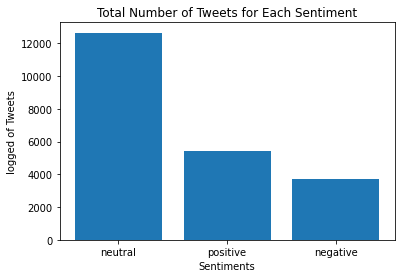

In [3]:
total_s = file["sentiment"].value_counts()
total_s
x = list(total_s.index.values)
y = total_s.tolist()

plt.subplots()
plt.bar(x,y)
plt.xlabel("Sentiments")
plt.ylabel("logged of Tweets")
plt.title("Total Number of Tweets for Each Sentiment")
plt.show()

In [4]:
no_link = pd.DataFrame(columns = list(file.columns))
yes_link = pd.DataFrame(columns = list(file.columns))
for i in range(len(file)):
    text = file.iloc[i].loc['text']
    if re.search("https:", text) == None:
        no_link = no_link.append(file.iloc[i])
    else:
        yes_link = yes_link.append(file.iloc[i])


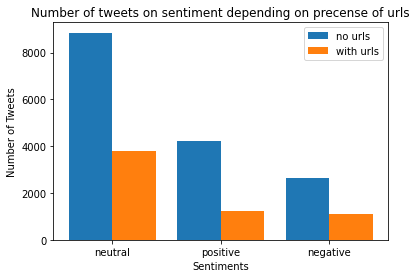

In [5]:
nourl_s = no_link["sentiment"].value_counts()
yesurl_s = yes_link["sentiment"].value_counts()
nourl_y = nourl_s.tolist()
yesurl_y = yesurl_s.tolist()
plt.subplots()

X_axis = np.arange(len(x))
plt.bar(X_axis - 0.2, nourl_y, 0.4, label = 'no urls')
plt.bar(X_axis + 0.2, yesurl_y, 0.4, label = 'with urls')

plt.xticks(X_axis, x)
plt.xlabel("Sentiments")
plt.ylabel("Number of Tweets")
plt.title("Number of tweets on sentiment depending on precense of urls")
plt.legend()
plt.show()

In [6]:
no_hash = pd.DataFrame(columns = list(file.columns))
yes_hash = pd.DataFrame(columns = list(file.columns))
for i in range(len(file)):
    text = file.iloc[i].loc['text']
    if re.search("#(\w)+", text) == None:
        no_hash = no_hash.append(file.iloc[i])
    else:
        yes_hash = yes_hash.append(file.iloc[i])

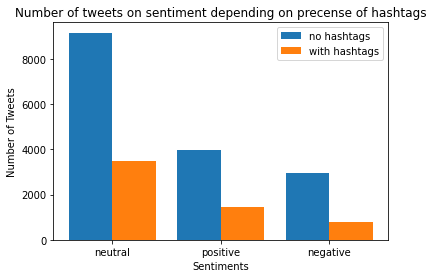

In [7]:
nohash_s = no_hash["sentiment"].value_counts()
yeshash_s = yes_hash["sentiment"].value_counts()

nohash_y = nohash_s.tolist()
yeshash_y = yeshash_s.tolist()
plt.subplots()

X_axis = np.arange(len(x))
plt.bar(X_axis - 0.2, nohash_y, 0.4, label = 'no hashtags')
plt.bar(X_axis + 0.2, yeshash_y, 0.4, label = 'with hashtags')

plt.xticks(X_axis, x)
plt.xlabel("Sentiments")
plt.ylabel("Number of Tweets")
plt.title("Number of tweets on sentiment depending on precense of hashtags")
plt.legend()
plt.show()


In [8]:
no_at = pd.DataFrame(columns = list(file.columns))
yes_at = pd.DataFrame(columns = list(file.columns))
for i in range(len(file)):
    text = file.iloc[i].loc['text']
    if re.search("\@(\w)+", text) == None:
        no_at = no_at.append(file.iloc[i])
    else:
        yes_at = yes_at.append(file.iloc[i])

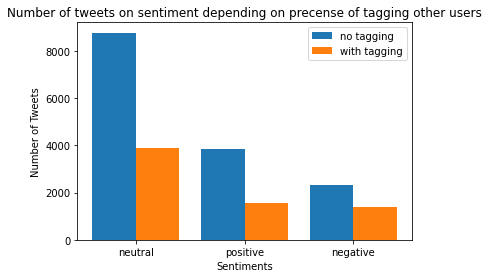

In [9]:
noat_s = no_at["sentiment"].value_counts()
yesat_s = yes_at["sentiment"].value_counts()

noat_y = noat_s.tolist()
yesat_y = yesat_s.tolist()
plt.subplots()

X_axis = np.arange(len(x))
plt.bar(X_axis - 0.2, noat_y, 0.4, label = 'no tagging')
plt.bar(X_axis + 0.2, yesat_y, 0.4, label = 'with tagging')

plt.xticks(X_axis, x)
plt.xlabel("Sentiments")
plt.ylabel("Number of Tweets")
plt.title("Number of tweets on sentiment depending on precense of tagging other users")
plt.legend()
plt.show()


## Code to create models and train test Models before full implementations


In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split


class ProcessingData:

    def __init__(self, test_csv, train_csv):

        self.train_data = pd.read_csv(train_csv, sep=',')
        self.test_data = pd.read_csv(test_csv, sep = ',')


    def set_values(self, df, columns):
        
        return [x[0] for x in df[[columns]].values] 


    def test_PreProcessData(self):
        
            t_train, t_test = train_test_split(self.train_data, test_size=0.1, shuffle= True)

            X_train = [x[0] for x in t_train[['text']].values] 
            Y_train = [x[0] for x in t_train[['sentiment']].values]

            X_test = [x[0] for x in t_test[['text']].values] 
            Y_test = [x[0] for x in t_test[['sentiment']].values]

            return X_train, Y_train, X_test, Y_test



    def PreProcessData(self):

        X_train_raw = [x[0] for x in self.train_data[['text']].values]
        Y_train = [x[0] for x in self.train_data[['sentiment']].values]
        X_test = [x[0] for x in self.test_data[['text']].values]

        return X_train_raw, Y_train, X_test
    
    def get_idList(self):

        return [x[0] for x in self.test_data[['id']].values]



In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, chi2

def tfidf_output(x_train, x_test):
    tfidf_vectorizer = TfidfVectorizer(stop_words= 'english', token_pattern='[a-zA-Z]+')

    #Build the feature set (vocabulary) and vectorise the Tarin dataset using TFIDF
    X_train_tfidf = tfidf_vectorizer.fit_transform(x_train)

    #Use the feature set (vocabulary) from Train to vectorise the Test dataset 
    X_test_tfidf = tfidf_vectorizer.transform(x_test)

    return X_train_tfidf, X_test_tfidf, tfidf_vectorizer

def x2_output(kvalue, x_train, x_test, y_train):
    
    x2 = SelectKBest(chi2, k=kvalue)
    X_train_x2 = x2.fit_transform(x_train, y_train)
    X_test_x2 = x2.transform(x_test)

    return X_train_x2, X_test_x2






In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import StackingClassifier

import warnings
warnings.simplefilter('ignore')



class Model():
        def __init__(self):
                self.zeroR = DummyClassifier()
                self.GNB = GaussianNB()
                self.DTC = DecisionTreeClassifier(max_depth=3)
                self.KNC =  KNeighborsClassifier(n_neighbors=5)
                self.LogR = LogisticRegression()



                self.models = [self.GNB,
                        self.zeroR,
                        self.DTC,
                        self.KNC,
                        self.LogR,
                        ]

                self.titles = [
                        'zero-r',
                        'GNB',
                        'Decision Tree',
                        'KNeighbors',
                        'LogisticRegression',
                        ]

                

        def Create_Model(self, x_train, x_test, y_train, y_test = 0, Kvalue = 0):
        
                dictKnumbers = {}

                for title, model in zip(self.titles, self.models):
                        

                        print('\n=========',title)
                        model.fit(x_train.todense(), y_train)
                        prediction = model.predict(x_test.todense())
                        #print(prediction)

                        if y_test != 0:
                
                                accuracy =  accuracy_score(y_test, prediction)


                                if title in dictKnumbers:
                                        dictKnumbers[title].append(Kvalue, accuracy)
                                else:
                                        dictKnumbers[title] = (Kvalue,accuracy)


                                print(accuracy)
                                print(classification_report(y_test, prediction))
                                    
                
                return dictKnumbers
            
        def getmodels(self):
            return [self.LogR, self.KNC, self.GNB]
                                       

#StackingClassifier class was taken from Prac-solution-08-2022 solutions
             
class StackingClassifier():

    def __init__(self, classifiers, metaclassifier):
        self.classifiers = classifiers
        self.metaclassifier = metaclassifier

    def fit(self, X, y):
        for clf in self.classifiers:
            clf.fit(X.todense(), y)
        X_meta = self._predict_base(X.todense())
        self.metaclassifier.fit(X_meta, y)
    
    def _predict_base(self, X):
        yhats = []
        for clf in self.classifiers:
            yhat = clf.predict_proba(X)
            yhats.append(yhat)
        yhats = np.concatenate(yhats, axis=1)
        assert yhats.shape[0] == X.shape[0]
        return yhats
    
    def predict(self, X, dence = 0):
        if dence == 1:
            X_meta = self._predict_base(X.todense())
        else:
            X_meta = self._predict_base(X)     
        yhat = self.metaclassifier.predict(X_meta)
        return yhat
    def score(self, X, y):
        yhat = self.predict(X.todense())
        print(accuracy_score(y, yhat))
        print(classification_report(y, yhat))
    



In [13]:
KVALUE = 4020


data = ProcessingData("test.csv","train.csv")

X_train, Y_train, X_test, Y_test = data.test_PreProcessData()

tfidf_train_x, tfidf_test_x, tfidf_vectorizer = tfidf_output(X_train, X_test)

x2_train_x, x2_test_x = x2_output(KVALUE,tfidf_train_x, tfidf_test_x, Y_train)

Mods = Model()

Mods.Create_Model(x2_train_x, x2_test_x, Y_train, Y_test)

ModStack = StackingClassifier(Mods.getmodels(), LogisticRegression())

ModStack.fit(x2_train_x,Y_train)
print("========= ensemble Stacking")
print(ModStack.score(x2_test_x, Y_test))




========= zero-r
0.6024759284731774
              precision    recall  f1-score   support

    negative       0.36      0.10      0.16       390
     neutral       0.64      0.80      0.72      1277
    positive       0.52      0.48      0.50       514

    accuracy                           0.60      2181
   macro avg       0.51      0.46      0.46      2181
weighted avg       0.56      0.60      0.56      2181


========= GNB
0.5855112333791839
              precision    recall  f1-score   support

    negative       0.00      0.00      0.00       390
     neutral       0.59      1.00      0.74      1277
    positive       0.00      0.00      0.00       514

    accuracy                           0.59      2181
   macro avg       0.20      0.33      0.25      2181
weighted avg       0.34      0.59      0.43      2181


========= Decision Tree
0.5983493810178817
              precision    recall  f1-score   support

    negative       0.00      0.00      0.00       390
     neutral  

In [14]:
data = ProcessingData("test.csv","train.csv")

X_train, Y_train, X_test, Y_test = data.test_PreProcessData()

tfidf_train_x, tfidf_test_x, tfidf_vectorizer = tfidf_output(X_train, X_test)

maxKvalue = (len(tfidf_vectorizer.get_feature_names()))
print(maxKvalue)

knumbers = []
for i in range(20,maxKvalue,8000):

    x2_train_x, x2_test_x = x2_output(i,tfidf_train_x, tfidf_test_x, Y_train)

    Mod = Model()

    knum = Mod.Create_Model(x2_train_x, x2_test_x, Y_train, Y_test,i)
    knumbers.append(knum)

    print(i)


print(knumbers)



40852

========= zero-r
0.255387436955525
              precision    recall  f1-score   support

    negative       0.19      0.86      0.32       374
     neutral       0.00      0.00      0.00      1265
    positive       0.45      0.44      0.44       542

    accuracy                           0.26      2181
   macro avg       0.21      0.43      0.25      2181
weighted avg       0.14      0.26      0.16      2181


========= GNB
0.5800091701054562
              precision    recall  f1-score   support

    negative       0.00      0.00      0.00       374
     neutral       0.58      1.00      0.73      1265
    positive       0.00      0.00      0.00       542

    accuracy                           0.58      2181
   macro avg       0.19      0.33      0.24      2181
weighted avg       0.34      0.58      0.43      2181


========= Decision Tree
0.5923888124713435
              precision    recall  f1-score   support

    negative       0.00      0.00      0.00       374
     neut

In [15]:

for i in range(20,8000,1000):

    x2_train_x, x2_test_x = x2_output(i,tfidf_train_x, tfidf_test_x, Y_train)

    Mod = Model()

    knum = Mod.Create_Model(x2_train_x, x2_test_x, Y_train, Y_test,i)
    knumbers.append(knum)

    print(i)

print(knumbers)


========= zero-r
0.255387436955525
              precision    recall  f1-score   support

    negative       0.19      0.86      0.32       374
     neutral       0.00      0.00      0.00      1265
    positive       0.45      0.44      0.44       542

    accuracy                           0.26      2181
   macro avg       0.21      0.43      0.25      2181
weighted avg       0.14      0.26      0.16      2181


========= GNB
0.5800091701054562
              precision    recall  f1-score   support

    negative       0.00      0.00      0.00       374
     neutral       0.58      1.00      0.73      1265
    positive       0.00      0.00      0.00       542

    accuracy                           0.58      2181
   macro avg       0.19      0.33      0.24      2181
weighted avg       0.34      0.58      0.43      2181


========= Decision Tree
0.5923888124713435
              precision    recall  f1-score   support

    negative       0.00      0.00      0.00       374
     neutral   

{'zero-r': (40020, 0.4103622191655204), 'GNB': (40020, 0.5749656121045392), 'Decision Tree': (40020, 0.5914718019257221), 'KNeighbors': (40020, 0.5749656121045392), 'LogisticRegression': (40020, 0.656121045392022)}


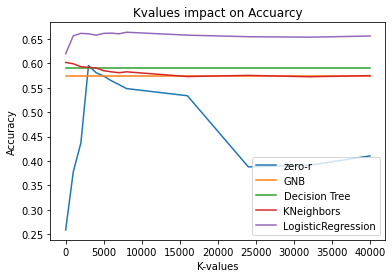

In [16]:
import matplotlib.pyplot as plt
import numpy as np
      
knumbers = [{'zero-r': (20, 0.2585969738651995), 'GNB': (20, 0.5749656121045392), 'Decision Tree': (20, 0.5914718019257221), 'KNeighbors': (20, 0.6020174232003668), 'LogisticRegression': (20, 0.6198991288399817)}, {'zero-r': (8020, 0.5483723062815222), 'GNB': (8020, 0.5749656121045392), 'Decision Tree': (8020, 0.5914718019257221), 'KNeighbors': (8020, 0.58276020174232), 'LogisticRegression': (8020, 0.6639156350298029)}, {'zero-r': (16020, 0.5337001375515819), 'GNB': (16020, 0.5749656121045392), 'Decision Tree': (16020, 0.5914718019257221), 'KNeighbors': (16020, 0.5731315910132967), 'LogisticRegression': (16020, 0.6579550664832645)}, {'zero-r': (24020, 0.3878954607977992), 'GNB': (24020, 0.5749656121045392), 'Decision Tree': (24020, 0.5914718019257221), 'KNeighbors': (24020, 0.5754241173773499), 'LogisticRegression': (24020, 0.6547455295735901)}, {'zero-r': (32020, 0.39110499770747365), 'GNB': (32020, 0.5749656121045392), 'Decision Tree': (32020, 0.5914718019257221), 'KNeighbors': (32020, 0.572673085740486), 'LogisticRegression': (32020, 0.6538285190279688)}, {'zero-r': (40020, 0.4103622191655204), 'GNB': (40020, 0.5749656121045392), 'Decision Tree': (40020, 0.5914718019257221), 'KNeighbors': (40020, 0.5749656121045392), 'LogisticRegression': (40020, 0.656121045392022)}, {'zero-r': (20, 0.2585969738651995), 'GNB': (20, 0.5749656121045392), 'Decision Tree': (20, 0.5914718019257221), 'KNeighbors': (20, 0.6020174232003668), 'LogisticRegression': (20, 0.6198991288399817)}, {'zero-r': (1020, 0.37780834479596515), 'GNB': (1020, 0.5749656121045392), 'Decision Tree': (1020, 0.5914718019257221), 'KNeighbors': (1020, 0.599266391563503), 'LogisticRegression': (1020, 0.6565795506648326)}, {'zero-r': (2020, 0.43695552498853735), 'GNB': (2020, 0.5749656121045392), 'Decision Tree': (2020, 0.5914718019257221), 'KNeighbors': (2020, 0.5933058230169647), 'LogisticRegression': (2020, 0.6616231086657497)}, {'zero-r': (3020, 0.5955983493810179), 'GNB': (3020, 0.5749656121045392), 'Decision Tree': (3020, 0.5914718019257221), 'KNeighbors': (3020, 0.5919303071985328), 'LogisticRegression': (3020, 0.6607060981201284)}, {'zero-r': (4020, 0.5809261806510775), 'GNB': (4020, 0.5749656121045392), 'Decision Tree': (4020, 0.5914718019257221), 'KNeighbors': (4020, 0.5905547913801009), 'LogisticRegression': (4020, 0.6579550664832645)}, {'zero-r': (5020, 0.5740486015589179), 'GNB': (5020, 0.5749656121045392), 'Decision Tree': (5020, 0.5914718019257221), 'KNeighbors': (5020, 0.5850527281063732), 'LogisticRegression': (5020, 0.6616231086657497)}, {'zero-r': (6020, 0.5644199908298946), 'GNB': (6020, 0.5749656121045392), 'Decision Tree': (6020, 0.5914718019257221), 'KNeighbors': (6020, 0.58276020174232), 'LogisticRegression': (6020, 0.6620816139385602)}, {'zero-r': (7020, 0.5566254011921137), 'GNB': (7020, 0.5749656121045392), 'Decision Tree': (7020, 0.5914718019257221), 'KNeighbors': (7020, 0.5809261806510775), 'LogisticRegression': (7020, 0.6607060981201284)}]
knumbers = sorted(knumbers, key=lambda x: x['zero-r'][0])

maxzerorK = max(knumbers, key=lambda x:x['zero-r'])

print(maxzerorK)

xvalues = [x['zero-r'][0]  for x in knumbers][1:]
yzeror = [x['zero-r'][1]  for x in knumbers][1:]
yMNB = [x['GNB'][1]  for x in knumbers][1:]
yDT = [x['Decision Tree'][1]  for x in knumbers][1:]
yKN = [x['KNeighbors'][1]  for x in knumbers][1:]
yLG = [x['LogisticRegression'][1]  for x in knumbers][1:]

plt.plot(xvalues, yzeror, label = "zero-r")
plt.plot(xvalues, yMNB, label = "GNB")
plt.plot(xvalues, yDT, label = "Decision Tree")
plt.plot(xvalues, yKN, label = "KNeighbors")
plt.plot(xvalues, yLG, label = "LogisticRegression")
plt.xlabel('K-values')
plt.ylabel("Accuracy")
plt.title("Kvalues impact on Accuarcy")
plt.legend()
plt.show()


## Final Output using written funcions
 
*(predicted actual test csv)*

In [17]:
KVALUE = 4020
data = ProcessingData("test.csv","train.csv")
X_train_raw, Y_train, X_test = data.PreProcessData()

X_train_tfidf, X_test_tfidf, vectoriser =tfidf_output(X_train_raw, X_test)
X_train_x2, X_test_x2 = x2_output(KVALUE, X_train_tfidf, X_test_tfidf, Y_train)

Mod1 = Model()

Mod1.Create_Model(X_train_x2, X_test_x2, Y_train)

ModStack1 = StackingClassifier(Mods.getmodels(), LogisticRegression())
ModStack1.fit(X_train_x2,Y_train)
print("========= ensemble Stacking")
prediction = ModStack1.predict(X_test_x2,1)







========= zero-r

========= GNB

========= Decision Tree

========= KNeighbors

========= LogisticRegression
========= ensemble Stacking


In [18]:
df = pd.DataFrame({'id':data.get_idList(),'sentiment': prediction})
df.to_csv('output1.csv',index = False)
